In [23]:
import pandas as pd

# Load your dataset (adjust the file path)
df = pd.read_csv('family_financial_and_transactions_data.csv')

# Inspect the first few rows
print(df.head())


  Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1        10/7/2024      Travel  409.12  113810   
1    FAM001  FAM001_Member1       10/16/2024      Travel  270.91  113810   
2    FAM001  FAM001_Member1       10/17/2024   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       10/25/2024  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       10/25/2024   Education  206.42  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   

   Financial Goals Met (%)  
0                       68 

In [24]:
print(df.columns)


Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)'],
      dtype='object')


In [25]:
print(df.head())


  Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1        10/7/2024      Travel  409.12  113810   
1    FAM001  FAM001_Member1       10/16/2024      Travel  270.91  113810   
2    FAM001  FAM001_Member1       10/17/2024   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       10/25/2024  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       10/25/2024   Education  206.42  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   

   Financial Goals Met (%)  
0                       68 

In [31]:
print(df.columns)


Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)'],
      dtype='object')


In [32]:
print(df.head())


  Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1        10/7/2024      Travel  409.12  113810   
1    FAM001  FAM001_Member1       10/16/2024      Travel  270.91  113810   
2    FAM001  FAM001_Member1       10/17/2024   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       10/25/2024  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       10/25/2024   Education  206.42  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   

   Financial Goals Met (%)  
0                       68 

In [33]:
# Remove leading/trailing spaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower()  # Convert all column names to lowercase
print(df.columns)  # Print the column names after cleaning


Index(['family id', 'member id', 'transaction date', 'category', 'amount',
       'income', 'savings', 'monthly expenses', 'loan payments',
       'credit card spending', 'dependents', 'financial goals met (%)'],
      dtype='object')


In [34]:
# Check for duplicate columns
print(df.columns[df.columns.duplicated()])

# Check for rows with missing values
print(df.isnull().sum())  # Check if there are missing values in any columns


Index([], dtype='object')
family id                  0
member id                  0
transaction date           0
category                   0
amount                     0
income                     0
savings                    0
monthly expenses           0
loan payments              0
credit card spending       0
dependents                 0
financial goals met (%)    0
dtype: int64


In [35]:
print(df)


      family id       member id transaction date       category  amount  \
0        FAM001  FAM001_Member1        10/7/2024         Travel  409.12   
1        FAM001  FAM001_Member1       10/16/2024         Travel  270.91   
2        FAM001  FAM001_Member1       10/17/2024      Groceries   91.10   
3        FAM001  FAM001_Member1       10/25/2024     Healthcare  198.23   
4        FAM001  FAM001_Member1       10/25/2024      Education  206.42   
...         ...             ...              ...            ...     ...   
16301    FAM200  FAM200_Member6       10/10/2024      Groceries   79.99   
16302    FAM200  FAM200_Member6       10/22/2024      Education  228.39   
16303    FAM200  FAM200_Member6       10/29/2024         Travel  258.63   
16304    FAM200  FAM200_Member6       10/26/2024         Travel  467.46   
16305    FAM200  FAM200_Member6       10/27/2024  Entertainment  475.34   

       income  savings  monthly expenses  loan payments  credit card spending  \
0      113810    2

In [38]:
# Assuming you've cleaned the column names
family_data = df.groupby('family id').agg({
    'income': 'sum',
    'monthly expenses': 'sum',
    'savings': lambda x: x.sum(),  # Calculate savings if not already available
    'credit card spending': lambda x: x.value_counts().to_dict()  # Breakdown by spending categories
})

# Display the family data
print(family_data.head())


             income  monthly expenses  savings credit card spending
family id                                                          
FAM001     10584330            537633  1881762           {2959: 93}
FAM002      3924096            495440  2595296            {995: 88}
FAM003      1564066            248254   534155           {2818: 47}
FAM004     12083620            341145  2919825            {668: 95}
FAM005     10897920            517440   199980          {1922: 165}


In [40]:
member_data = df.groupby('member id').agg({
    'income': 'sum',
    'monthly expenses': 'sum',
    'credit card spending': 'value_counts'
})


In [48]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import seaborn as sns


In [50]:
import matplotlib.pyplot as plt


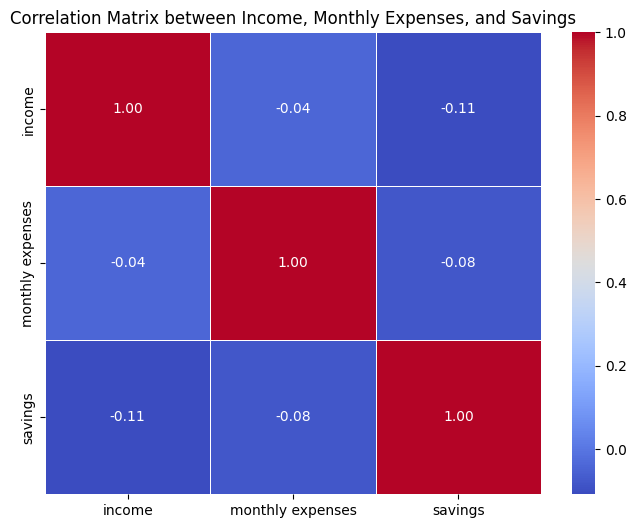

In [51]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and cleaned

# Make sure column names are correctly formatted
df.columns = df.columns.str.strip().str.lower()  # Standardize column names (lowercase and remove spaces)

# Ensure no missing values in the specified columns
df = df.dropna(subset=['income', 'monthly expenses', 'savings'])

# Compute the correlation matrix
correlation_matrix = df[['income', 'monthly expenses', 'savings']].corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix between Income, Monthly Expenses, and Savings")
plt.show()


In [53]:
def calculate_financial_score(row):
    score = 0
    score += (row['savings_income_ratio'] * 30)
    score += ((100 - row['monthly expenses_income_percentage']) * 20)
    score += ((100 - row['loan_payments_percentage']) * 15)
    score += (100 - row['credit_card_spending_trend']) * 15
    score += (100 - row['luxury_spending_percentage']) * 10
    score += row['financial_goals_met_percentage'] * 10
    return score


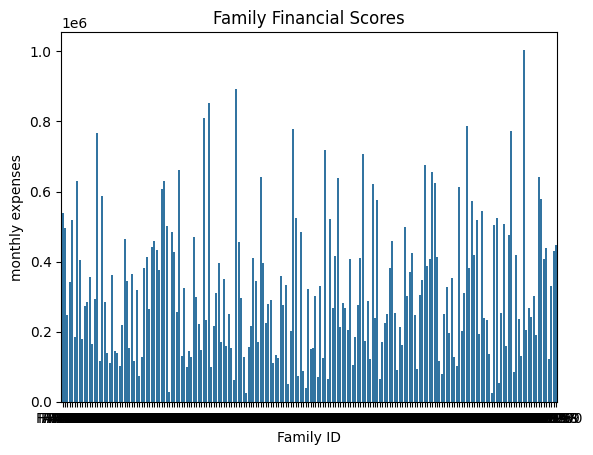

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Family financial scores bar plot
sns.barplot(x='family id', y='monthly expenses', data=family_data)
plt.title('Family Financial Scores')
plt.xlabel('Family ID')
plt.ylabel('monthly expenses')
plt.show()


In [62]:
pip install flask

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/score', methods=['POST'])
def score():
    data = request.get_json()
    family_data = process_data(data)  # Assuming process_data is your data processing function
    score = calculate_financial_score(family_data)
    insights = generate_insights(score)  # Function to generate insights based on the score
    return jsonify({"score": score, "insights": insights})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [65]:
pip install streamlit

   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.6 MB 9.1 MB/s eta 0:00:01
   ------------------ --------------------- 3.9/8.6 MB 9.4 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.6 MB 10.0 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.6 MB 8.9 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.6 MB 7.3 MB/s eta 0:00:01
   ------------------------------------ --- 7.9/8.6 MB 6.5 MB/s eta 0:00:01
   -------------------------------------- - 8.4/8.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 8.6/8.6 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   ---------------------------- ----------- 524.3/731.2 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 731.2/731.2 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   - ----------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import streamlit as st

# Define financial score
score = 68  # Example score (you can replace this with your actual calculation)

# Define insights based on the score
insights = "This financial score indicates a strong financial position with manageable debt and good cash flow."  # Example insights

# Set title of the dashboard
st.title("Financial Insights Dashboard")

# Display score and insights
st.write(f"Financial Score: {score}")
st.write(f"Insights: {insights}")

2024-11-26 13:00:14.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 13:00:14.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 13:00:14.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 13:00:14.096 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 13:00:14.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 13:00:14.100 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 13:00:14.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 13:00:14.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar